In [1]:
from urllib import request
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import decomposition
from sklearn import preprocessing
sns.set()
# Python program to read 
# json file 
import pandas
import random
import cv2

import os

import csv
# example of using a pre-trained model as a classifier
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

import json 

Using TensorFlow backend.
C:\Users\jcrro\anaconda3\envs\Env_P6_1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jcrro\anaconda3\envs\Env_P6_1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jcrro\anaconda3\envs\Env_P6_1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jcrro\anaconda3\envs\Env_P6_1

In [2]:
import time
tic = time.clock()

# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [3]:
%matplotlib inline
import os
import random
import numpy as np
import json
import matplotlib.pyplot
import pickle
from matplotlib.pyplot import imshow
from PIL import Image
from sklearn.manifold import TSNE

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# Données photos

In [5]:
filename = "dataphotos.csv" 
n = sum(1 for line in open(filename))-1  # Calculate number of rows in file
s = n//999  # sample size of 999%
skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
dataphotospourcent = pandas.read_csv(filename, skiprows=skip)

In [6]:
dataphotospourcent

,photo_id,business_id,caption,label
0,0i_FoFshaoW0ZtHamegKwA,MkKMmLQGtuZnjw-5GqLwqQ,NaN,food
1,0R4cJ3bjRB-MHnvKplCuDw,GA_Nx4xA3Z4pn9i5XKF1Wg,NaN,inside
2,0YKjmnI5ccQ8d5hVlFtluQ,bjSC_jbrypke0l-bXXBmwQ,Crab Cake- PHENOMENAL!!!!,food
3,10YTkn4MPwC9fwGOXUS73w,AN0bWhisCf6LN9eHZ7DQ3w,NaN,food
4,1KbKHhqyA0aUW3jzjN_jeA,wY89ma0V0g8U0G51_i_LZA,McDonald's All Day Breakfast Sandwiches,food
...,...,...,...,...
194,ZI2pvfSxxmzMjQ10bSeIjQ,K0j_Znzin0jShXVnpvW86A,NaN,food
195,ZWtjv_6g-B2tv_8RQO5Vnw,UVVjnJ67fm9EbNPFK5ZgRQ,Legit jazz.,inside
196,zypj5FyMznsWq42MN0wgOg,yHCoJZh5nx0Onr5xgMaUHg,NaN,outside
197,ZYpVAwMlN4MwCntD5ASNaA,gO_z_5FQVHLCiJjOsfE1fg,NaN,inside


In [7]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

In [8]:
def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [9]:
images_path = 'yelp_photos/photos/'
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 200

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(range(len(images)), max_num_images))]


In [10]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)

In [11]:
features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        toc = time.clock()
        elap = toc-tic;
        tic = time.clock()
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)

# TSNE

In [12]:
X = np.array(features)
tsne = TSNE(n_components=2, learning_rate=150, perplexity=30, angle=0.2, verbose=2).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.067s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 22.600989
[t-SNE] Computed conditional probabilities in 0.015s
[t-SNE] Iteration 50: error = 75.8189545, gradient norm = 0.5011410 (50 iterations in 0.056s)
[t-SNE] Iteration 100: error = 80.8432999, gradient norm = 0.5060747 (50 iterations in 0.055s)
[t-SNE] Iteration 150: error = 80.3728256, gradient norm = 0.4789999 (50 iterations in 0.055s)
[t-SNE] Iteration 200: error = 80.8682175, gradient norm = 0.5338336 (50 iterations in 0.053s)
[t-SNE] Iteration 250: error = 77.6192703, gradient norm = 0.5084190 (50 iterations in 0.056s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.619270
[t-SNE] Iteration 300: error = 1.0973451, gradient norm = 0.0118667 (50 iterations in 0.058s)
[t-SNE] Iteration 350: error = 0.8921947, gradient norm = 0.0124147 

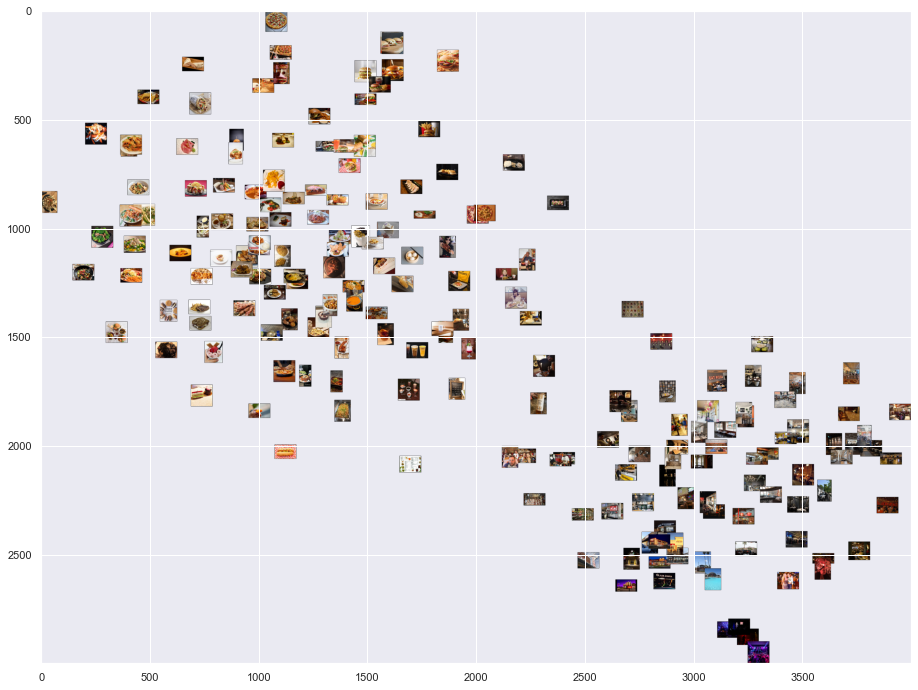

In [13]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))
width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(images, tx, ty):
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)